In [ ]:
# https://github.com/lsjsj92/keras_basic/blob/master/7.%20predict_multi_img_with_CNN.ipynb

In [1]:
!unzip -qq "./향수.zip"

In [2]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split


caltech_dir = "./"
categories = ["딥디크_도손", "르라보_상탈", "마르지엘라_커피브레이크", "바이레도_집시워터",
              "샤넬_블루드","아쿠아디파르마_미르토","에르메스_운 자르뎅 수르닐", "이솝_테싯", 
              "조말론_네롤리", "존바바토스_아티산","크리드_로얄워터", "톰포드_화이트 스웨이드",]
nb_classes = len(categories)

# 이미지 사이즈는 정확도에 영향을 별로 안주는 것 같음
# 128 -> 0.5752
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


# train / test 셋 나누기
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
xy = (X_train, X_test, X_val, y_train, y_test , y_val)
np.save("./multi_image_data.npy", xy)

print("ok", len(y))


딥디크_도손  파일 길이 :  55
딥디크_도손  :  .//딥디크_도손/딥디크_도손_21.jpg
르라보_상탈  파일 길이 :  51
르라보_상탈  :  .//르라보_상탈/르라보_상탈_36.jpg
마르지엘라_커피브레이크  파일 길이 :  44
마르지엘라_커피브레이크  :  .//마르지엘라_커피브레이크/마르지엘라_커피브레이크_29.jpg
바이레도_집시워터  파일 길이 :  48
바이레도_집시워터  :  .//바이레도_집시워터/바이레도_집시워터_9.jpg
샤넬_블루드  파일 길이 :  56
샤넬_블루드  :  .//샤넬_블루드/샤넬_블루드_3.jpg
아쿠아디파르마_미르토  파일 길이 :  57
아쿠아디파르마_미르토  :  .//아쿠아디파르마_미르토/아쿠아디파르마_미르토_15.jpg
에르메스_운 자르뎅 수르닐  파일 길이 :  54
에르메스_운 자르뎅 수르닐  :  .//에르메스_운 자르뎅 수르닐/에르메스_운 자르뎅 수르닐_49.jpg
이솝_테싯  파일 길이 :  55
이솝_테싯  :  .//이솝_테싯/이솝_테싯_58.jpg
조말론_네롤리  파일 길이 :  56
조말론_네롤리  :  .//조말론_네롤리/조말론_네롤리_46.jpg
존바바토스_아티산  파일 길이 :  44
존바바토스_아티산  :  .//존바바토스_아티산/존바바토스_아티산_25.jpg
크리드_로얄워터  파일 길이 :  52
크리드_로얄워터  :  .//크리드_로얄워터/크리드_로얄워터_7.jpg
톰포드_화이트 스웨이드  파일 길이 :  39
톰포드_화이트 스웨이드  :  .//톰포드_화이트 스웨이드/톰포드_화이트 스웨이드_35.jpg
ok 611


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [3]:
# npy 파일 가져와서 set만들기

In [4]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


# import keras.backend.tensorflow_backend as K
import tensorflow.compat.v1.keras.backend as K


import tensorflow as tf
# config = tf.ConfigProto()
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
#session = tf.Session(config=config)
session =tf.compat.v1.Session()

X_train, X_test, X_val,y_train, y_test,y_val = np.load('./multi_image_data.npy', allow_pickle=True)
print("train_Set shape 확인 : ", X_train.shape)

categories = ["딥디크_도손", "르라보_상탈", "마르지엘라_커피브레이크", "바이레도_집시워터",
              "샤넬_블루드","아쿠아디파르마_미르토","에르메스_운 자르뎅 수르닐", "이솝_테싯", 
              "조말론_네롤리", "존바바토스_아티산","크리드_로얄워터", "톰포드_화이트 스웨이드",]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_val.astype(float) / 255

train_Set shape 확인 :  (390, 64, 64, 3)


In [ ]:
# 테스트 모델(1번)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# datagen
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(   
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [7]:
batch_size = 32

# train_gen은 x (그림)과 y (label)을 함께 생성합니다.
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)

In [8]:
# 에포크는 높으면 정확도 상승
history = model.fit(train_gen, epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
13/13 [==============================] - 5s 283ms/step - loss: 4.2970 - accuracy: 0.0897 - val_loss: 2.4847 - val_accuracy: 0.1224
Epoch 2/20
13/13 [==============================] - 3s 262ms/step - loss: 2.4840 - accuracy: 0.0821 - val_loss: 2.4793 - val_accuracy: 0.1224
Epoch 3/20
13/13 [==============================] - 3s 265ms/step - loss: 2.4754 - accuracy: 0.1179 - val_loss: 2.4738 - val_accuracy: 0.1327
Epoch 4/20
13/13 [==============================] - 3s 263ms/step - loss: 2.4384 - accuracy: 0.0974 - val_loss: 2.4044 - val_accuracy: 0.0816
Epoch 5/20
13/13 [==============================] - 3s 263ms/step - loss: 2.3517 - accuracy: 0.1154 - val_loss: 2.3162 - val_accuracy: 0.1327
Epoch 6/20
13/13 [==============================] - 4s 265ms/step - loss: 2.2866 - accuracy: 0.1692 - val_loss: 2.2333 - val_accuracy: 0.2143
Epoch 7/20
13/13 [==============================] - 3s 264ms/step - loss: 2.2210 - accuracy: 0.1974 - val_loss: 2.1654 - val_accuracy: 0.2653
Epoch 

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 63ms/step - loss: 1.5650 - accuracy: 0.5691


[1.5649815797805786, 0.5691056847572327]

In [ ]:
# 테스트 모델(2번)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.1)) # 0.01 -> 1.0 -> 0.1

model2 = Sequential()
model2.add(keras.layers.BatchNormalization())
model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(RegularizedDense(100))
model2.add(Dropout(0.2))
    
model2.add(keras.layers.BatchNormalization())  
model2.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(RegularizedDense(300))
model2.add(Dropout(0.2))
    
model2.add(Flatten())
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(RegularizedDense(300))
model2.add(Dense(nb_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=20, batch_size=batch_size,
                     validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 18s 861ms/step - loss: 81.0084 - accuracy: 0.2409 - val_loss: 603.8226 - val_accuracy: 0.1273
Epoch 2/20
16/16 [==============================] - 13s 842ms/step - loss: 72.2580 - accuracy: 0.5061 - val_loss: 853.6845 - val_accuracy: 0.0909
Epoch 3/20
16/16 [==============================] - 13s 839ms/step - loss: 64.1002 - accuracy: 0.6883 - val_loss: 1404.6603 - val_accuracy: 0.0727
Epoch 4/20
16/16 [==============================] - 13s 832ms/step - loss: 57.3278 - accuracy: 0.7874 - val_loss: 1641.5026 - val_accuracy: 0.0727
Epoch 5/20
16/16 [==============================] - 18s 1s/step - loss: 51.1922 - accuracy: 0.8441 - val_loss: 1049.8253 - val_accuracy: 0.0909
Epoch 6/20
16/16 [==============================] - 15s 893ms/step - loss: 46.3480 - accuracy: 0.7895 - val_loss: 1215.6057 - val_accuracy: 0.0545
Epoch 7/20
16/16 [==============================] - 16s 974ms/step - loss: 41.5094 - accuracy: 0.8117 - val_loss: 966.2421 

KeyboardInterrupt: ignored

In [ ]:
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 68ms/step - loss: 4.5231 - accuracy: 0.1290


[4.5230841636657715, 0.12903225421905518]

In [ ]:
# 테스트 모델(3번)

In [ ]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

model3 = Sequential()
model3.add(Conv2D(32, (3,3), padding="same", input_shape=(64,64,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
    
model3.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
    
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(12, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=20, batch_size=batch_size,
                     validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 255ms/step - loss: 3.4044 - accuracy: 0.0911 - val_loss: 16.5215 - val_accuracy: 0.0909
Epoch 2/20
16/16 [==============================] - 4s 244ms/step - loss: 2.4828 - accuracy: 0.0810 - val_loss: 3.5532 - val_accuracy: 0.1091
Epoch 3/20
16/16 [==============================] - 4s 244ms/step - loss: 2.4157 - accuracy: 0.1356 - val_loss: 19.6178 - val_accuracy: 0.2000
Epoch 4/20
16/16 [==============================] - 4s 243ms/step - loss: 2.2106 - accuracy: 0.2186 - val_loss: 20.1125 - val_accuracy: 0.3455
Epoch 5/20
16/16 [==============================] - 4s 245ms/step - loss: 1.9489 - accuracy: 0.3421 - val_loss: 58.5214 - val_accuracy: 0.3455
Epoch 6/20
16/16 [==============================] - 6s 361ms/step - loss: 1.7907 - accuracy: 0.4109 - val_loss: 71.1203 - val_accuracy: 0.3455
Epoch 7/20
16/16 [==============================] - 7s 445ms/step - loss: 1.5615 - accuracy: 0.4777 - val_loss: 101.2172 - val_accuracy: 0.4182

In [ ]:
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 60ms/step - loss: 2.8035 - accuracy: 0.4355


[2.8035290241241455, 0.4354838728904724]

In [ ]:
# 테스트 모델(4번)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow import keras
import numpy as np
import os

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(3, 3)))
model4.add(Dropout(0.5))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))

model4.add(Conv2D(128, (3, 3)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))

# 전결합층
model4.add(Flatten())    # 벡터형태로 reshape
model4.add(Dense(64))   # 출력
model4.add(Activation('relu'))
model4.add(Dropout(0.6))

model4.add(Dense(nb_classes))
model4.add(Activation('softmax'))
# 모델 구축하기
model4.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='nadam',
    metrics=['accuracy'])

history = model4.fit(X_train, y_train, epochs=20, batch_size=16,
                     validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 6s 155ms/step - loss: 2.6121 - accuracy: 0.0513 - val_loss: 2.4940 - val_accuracy: 0.0816
Epoch 2/20
25/25 [==============================] - 3s 126ms/step - loss: 2.4927 - accuracy: 0.0795 - val_loss: 2.4870 - val_accuracy: 0.0714
Epoch 3/20
25/25 [==============================] - 3s 126ms/step - loss: 2.4907 - accuracy: 0.0974 - val_loss: 2.4914 - val_accuracy: 0.0918
Epoch 4/20
25/25 [==============================] - 3s 127ms/step - loss: 2.4779 - accuracy: 0.1205 - val_loss: 2.4848 - val_accuracy: 0.0816
Epoch 5/20
25/25 [==============================] - 3s 126ms/step - loss: 2.5220 - accuracy: 0.1231 - val_loss: 2.4766 - val_accuracy: 0.1633
Epoch 6/20
25/25 [==============================] - 3s 127ms/step - loss: 2.4761 - accuracy: 0.1154 - val_loss: 2.4760 - val_accuracy: 0.0918
Epoch 7/20
25/25 [==============================] - 3s 127ms/step - loss: 2.4509 - accuracy: 0.1231 - val_loss: 2.4371 - val_accuracy: 0.1735
Epoch 

In [ ]:
#######################################################################################################
# 테스트 셋 정확도 확인

In [ ]:
model4.evaluate(X_test, y_test)

4/4 [==============================] - 0s 59ms/step - loss: 1.6337 - accuracy: 0.4472


[1.633741855621338, 0.4471544623374939]

In [ ]:
print(X_test.shape) # 611-458

(494, 64, 64, 3)


[0 0 0 0 0 0 1 0 0 0 0 0]


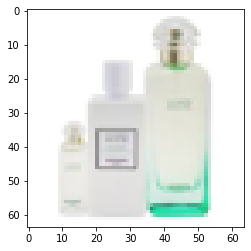

In [ ]:
print(y_test[2])
plt.imshow(X_test[2])
plt.show()

In [ ]:
'''
test_size = X_test.size
for i in range(153):
  print((model.predict(np.array([X_test[i],]))))
  b = np.argmax(model.predict(np.array([X_test[i],])))
  
  plt.imshow(X_test[i])
  plt.show()
  
  print("predict : ", b)
  for j in range(12):
    if y_test[i][j] == 1:
      print("answer : ", j)
  print("----------------------------------------------------------------")
'''

'\ntest_size = X_test.size\nfor i in range(153):\n  print((model.predict(np.array([X_test[i],]))))\n  b = np.argmax(model.predict(np.array([X_test[i],])))\n  \n  plt.imshow(X_test[i])\n  plt.show()\n  \n  print("predict : ", b)\n  for j in range(12):\n    if y_test[i][j] == 1:\n      print("answer : ", j)\n  print("----------------------------------------------------------------")\n'

In [ ]:
# 모델 저장하기

In [10]:
model.save("test_model")

INFO:tensorflow:Assets written to: test_model/assets


In [11]:
model_dir = './model'
    
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
# 모델 변환하기

In [13]:
converter = tf.lite.TFLiteConverter.from_saved_model('./test_model')
tflite_model = converter.convert()
with open('./perfume1_model.tflite', 'wb') as f:
  f.write(tflite_model)